# סינון רעשים

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import scipy.signal as sig
import scipy.fft as fft

def plot_filter_responce(taps):
    w,h = sig.freqz(taps, fs=fs)
    plt.figure()
    plt.semilogy(w,np.abs(h)**2)
    plt.xlabel('$f [Hz]$')
    plt.ylabel(r'$\left|\tilde{H}\left(f\right)\right|^{2}$')
    plt.show()

def plot_frequency(x,fs=1):
    x_f= fft.fftshift(fft.fft(x))
    f_axis = fft.fftshift(fft.fftfreq(len(x),1/fs))
    plt.figure()
    plt.semilogy(f_axis,np.abs(x_f))
    plt.show()

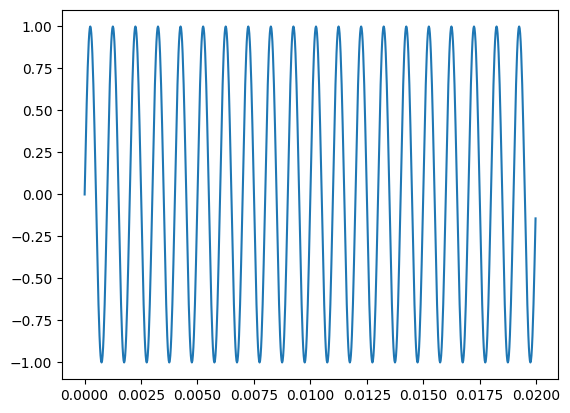

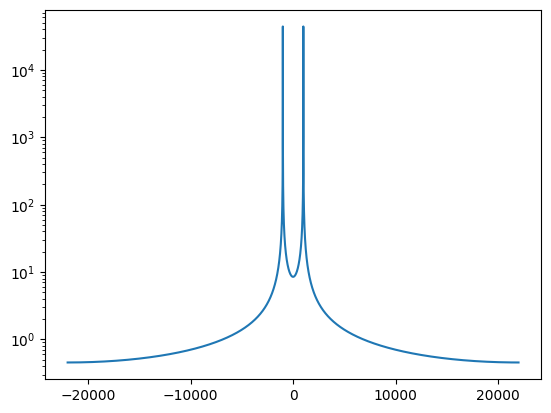

In [2]:
fs = 44000
N = 100000
t_axis = np.arange(N)/fs

f0 = 1000 # hz
w0 = 2*np.pi*f0 # 100 Hz
plot_cut = int(20*fs/f0) # show 2 cycles

A = 1
x = A*np.sin(w0*t_axis)
plt.figure()
plt.plot(t_axis[:plot_cut],x[:plot_cut])
plt.show()
plot_frequency(x,fs)
display(Audio(x,rate=fs))

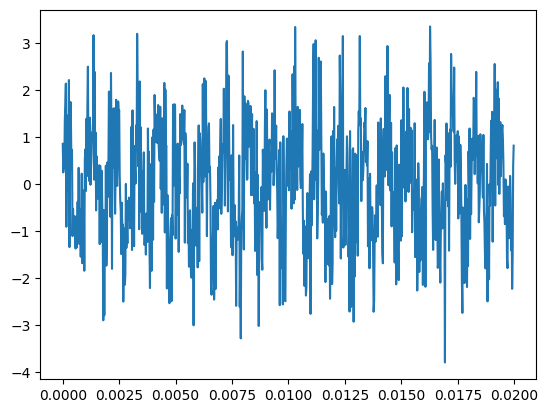

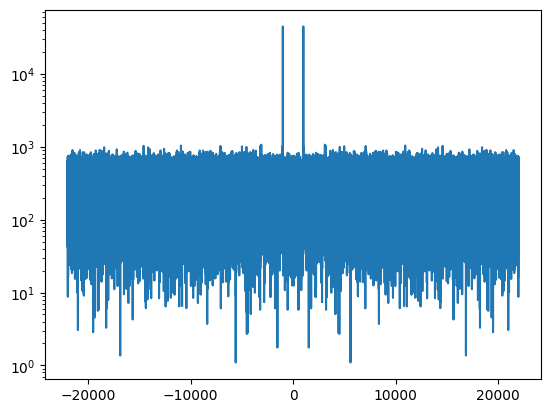

In [3]:
N0 = 1
noise = np.random.normal(0,A*N0,N)
x_noisy = x+noise
plt.figure()
plt.plot(t_axis[:plot_cut],x_noisy[:plot_cut])
plt.show()
plot_frequency(x_noisy,fs)
display(Audio(x_noisy,rate=fs))

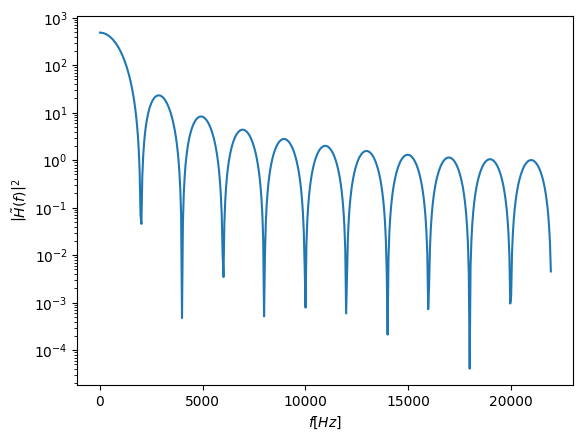

In [89]:
half_wavelength_samples = int(fs/(f0*2))
filter_taps = np.ones(half_wavelength_samples)
plot_filter_responce(filter_taps)

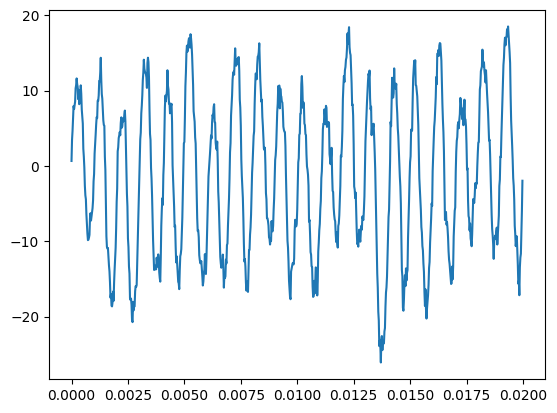

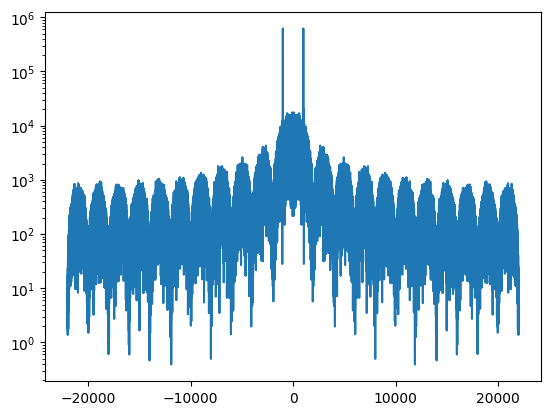

In [92]:
y = sig.convolve(x_noisy,filter_taps,mode='same')
plt.figure()
plt.plot(t_axis[:plot_cut],y[:plot_cut])
plt.show()
plot_frequency(y,fs)
display(Audio(y,rate=fs))